#### Name: Marwa Samy
#### Project:Discovery Udemy Courses Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
data = pd.read_csv('Udemy_Courses.csv')
data.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments


In [6]:
print('Number of Rows',data.shape[0])
print('Number of Columns',data.shape[1])

Number of Rows 3682
Number of Columns 11


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


Data Cleaning

In [8]:
data.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<AxesSubplot:>

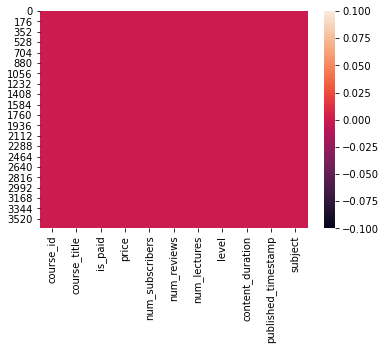

In [9]:
sns.heatmap(data.isnull())

In [10]:
data.duplicated().any()

True

In [11]:
data=data.drop_duplicates()

In [12]:
data.duplicated().any()

False

Find out Number of courses Per subjects

In [15]:
data['subject'].value_counts()

Web Development        1199
Business Finance       1195
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


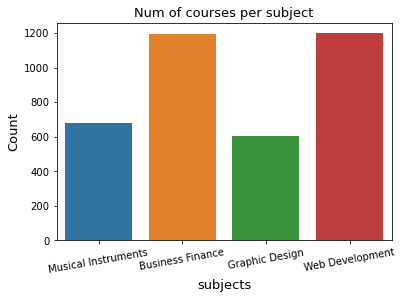

In [37]:
sns.countplot(data['subject'])
plt.xlabel('subjects',fontsize=13)
plt.title('Num of courses per subject',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.xticks(rotation=10)
plt.show()

Levels of Udemy Courses having

In [19]:
data['level'].value_counts()

All Levels            1928
Beginner Level        1269
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


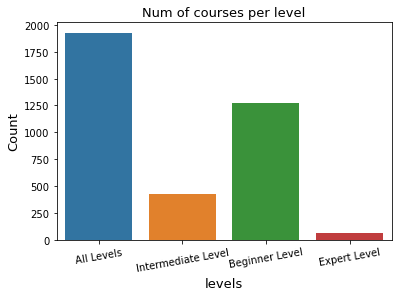

In [36]:
sns.countplot(data['level'])
plt.xlabel('levels',fontsize=13)
plt.title('Num of courses per level',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.xticks(rotation=10)
plt.show()

Display Count of Paid and Free Courses

In [27]:
print("Number of Paid Courses is",len(data[data['is_paid']==True]))

Number of Paid Courses is 3366


In [28]:
print("Number of Free Courses is",len(data[data['is_paid']==False]))

Number of Free Courses is 310


C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


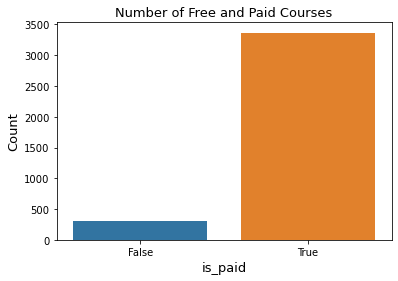

In [35]:
sns.countplot(data['is_paid'])
plt.title('Number of Free and Paid Courses',fontsize=13)
plt.xlabel('is_paid',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.show()

Which Course have more lectures (free or paid)?

In [45]:
data.groupby(['is_paid'])['num_lectures'].mean().sort_values(ascending=False)

is_paid
True     41.816993
False    21.416129
Name: num_lectures, dtype: float64

Which Courses have high num of subscribers(free or paid)?

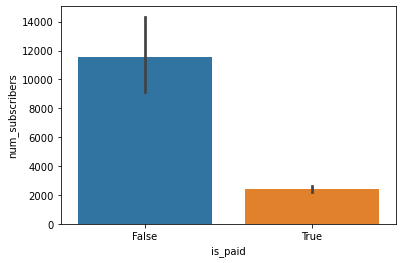

In [46]:
sns.barplot(x='is_paid',y='num_subscribers',data=data)
plt.show()

Which Level has The highest number of Subscribers?

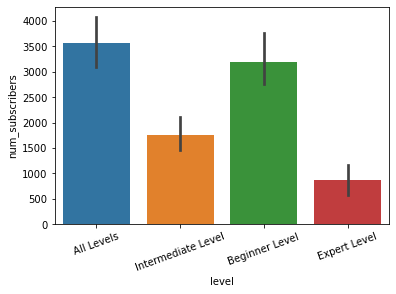

In [48]:
sns.barplot(x='level',y='num_subscribers',data=data)
plt.xticks(rotation=20)
plt.show()

Find Most popular Course Title

In [52]:
data[data['num_subscribers'].max()==data['num_subscribers']]['course_title']

2230    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

Display Top 10 Courses

In [56]:
Top10=data.sort_values(by='num_subscribers',ascending=False).head(10)

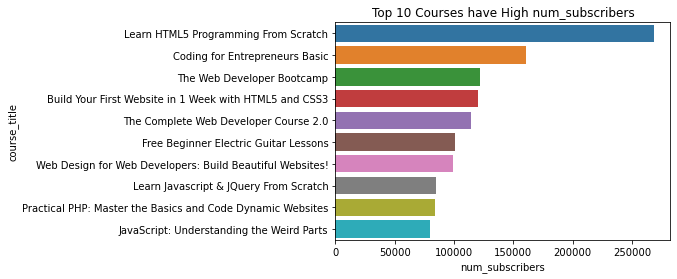

In [72]:
sns.barplot(y='course_title',x='num_subscribers',data=Top10)
plt.title('Top 10 Courses have High num_subscribers')
plt.show()

Which (Level,Subject,Course) have The highest Num of Reviews?

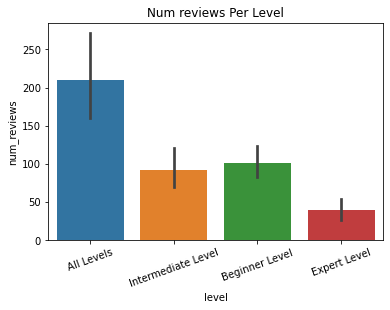

In [68]:
sns.barplot(y='num_reviews',x='level',data=data)
plt.title('Num reviews Per Level')
plt.xticks(rotation=20)
plt.show()

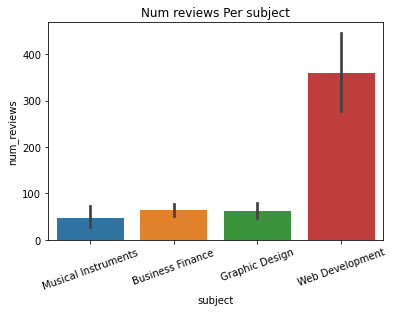

In [66]:
sns.barplot(y='num_reviews',x='subject',data=data)
plt.title('Num reviews Per subject')
plt.xticks(rotation=20)
plt.show()

In [74]:
TopReviews=data.sort_values(by='num_reviews',ascending=False).head(10)

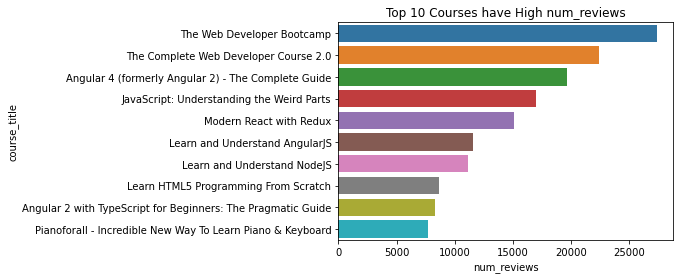

In [75]:
sns.barplot(y='course_title',x='num_reviews',data=TopReviews)
plt.title('Top 10 Courses have High num_reviews')
plt.show()

Which Courses have high num of reviews(free or paid)?

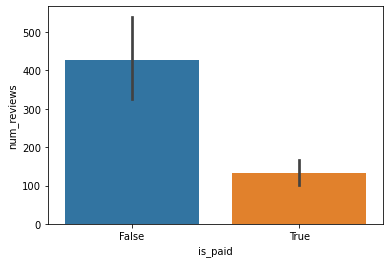

In [76]:
sns.barplot(x='is_paid',y='num_reviews',data=data)
plt.show()

Does Price affect Num of Reviews?

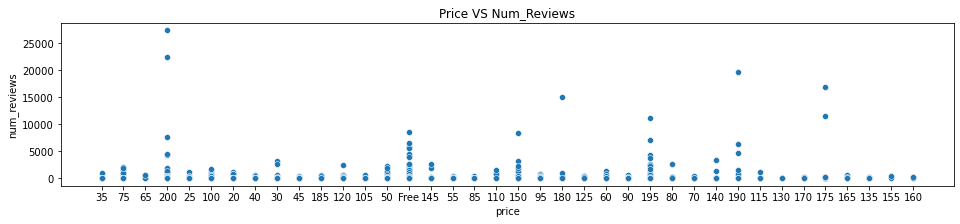

In [80]:
plt.figure(figsize=(16,3))
sns.scatterplot(x='price',y='num_reviews',data=data)
plt.title('Price VS Num_Reviews')
plt.show()

Find Total Num of courses Related To python

In [85]:
len(data[data['course_title'].str.contains('python',case=False)])

29

Display 10 Most popular python Courses

In [88]:
popular_python_Courses=data[data['course_title'].str.contains('python',case=False)].sort_values(by='num_subscribers',ascending=False).head(10)

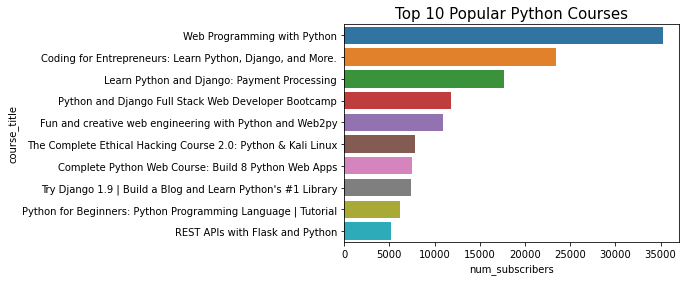

In [91]:
sns.barplot(y='course_title',x='num_subscribers',data=popular_python_Courses)
plt.title('Top 10 Popular Python Courses',fontsize=15)
plt.show()

In which year have the highest num of courses were posted?

In [96]:
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])
data['Year']=data['published_timestamp'].dt.year
data.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014


C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


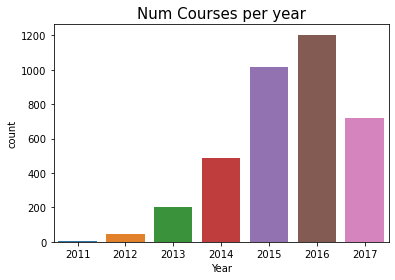

In [99]:
sns.countplot('Year',data=data)
plt.title('Num Courses per year',fontsize=15)
plt.show()

Display Num of subject that are posted per year

In [102]:
data.groupby('Year')['subject'].value_counts()

Year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       227
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64

In [141]:
data['content_duration'].value_counts()

1 hour           606
1.5 hours        506
2 hours          419
2.5 hours        269
3 hours          248
                ... 
43.5 hours         1
218 questions      1
27 mins            1
76.5 hours         1
29 mins            1
Name: content_duration, Length: 109, dtype: int64